In [3]:
%autoreload 2
%matplotlib inline

UsageError: Line magic function `%autoreload` not found.


In [4]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
from scipy.special import factorial

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import path as mpath
import matplotlib.gridspec as gridspec

import pickle
import tabulate
import wandb
from collections import namedtuple

import meta_learning_data_analysis as analysis
import meta_learning_analysis_plots as plots

In [5]:
np.set_printoptions(linewidth=160)
# Avoid escaping any latex characters
tabulate.LATEX_ESCAPE_RULES = {}

MIN_FONT_SIZE = 14
LABELS_FONT_SIZE = 20
TITLE_FONT_SIZE = 24

matplotlib.rcParams.update({'font.size': MIN_FONT_SIZE})
FONT_DICT = dict(fontsize=LABELS_FONT_SIZE) 
TITLE_FONT_DICT = dict(fontsize=TITLE_FONT_SIZE)

PER_PLOT_WIDTH = 6

QUERY_ORDINAL_POSITION_COMORLAP= 'cool'
NUM_TIMES_TRAINED_COLORMAP = 'copper'

In [7]:
cache = analysis.refresh_cache()
print(cache.keys())

six_replications_analyses = cache['six_replications_analyses']
# query_mod_replications = cache['query_mod_replications']
control_analyses = cache['control_analyses']
six_replications_updated_analyses = cache['six_replications_updated_analyses']
control_updated_analyses = cache['updated_control_analyses']
query_mod_updated_analyses = cache['query_mod_updated_analyses']
task_conditional_analyses = cache['task_conditional_analyses']
task_conditional_multiplicative_only_analyses = cache['task_conditional_multiplicative_only_analyses']
task_conditional_additive_only_analyses = cache['task_conditional_additive_only_analyses']

dict_keys(['six_replications_analyses', 'control_analyses', 'query_mod_replications', 'six_replications_updated_analyses', 'updated_control_analyses', 'query_mod_updated_analyses', 'forgetting_curves_raw_data', 'preliminary_maml_analyses', 'baseline_maml_comparison_analyses', 'maml_analyses', 'maml_alpha_0_analyses', 'maml_meta_test_analyses', 'balanced_batches_analyses', 'baseline_total_curve_analyses', 'control_total_curve_analyses', 'query_mod_total_curve_analyses', 'simultaneous_training_analyses', 'per_task_simultaneous_training_analyses', 'task_conditional_analyses', 'task_conditional_multiplicative_only_analyses', 'task_conditional_additive_only_analyses'])


-------

# Plotting the new analyses

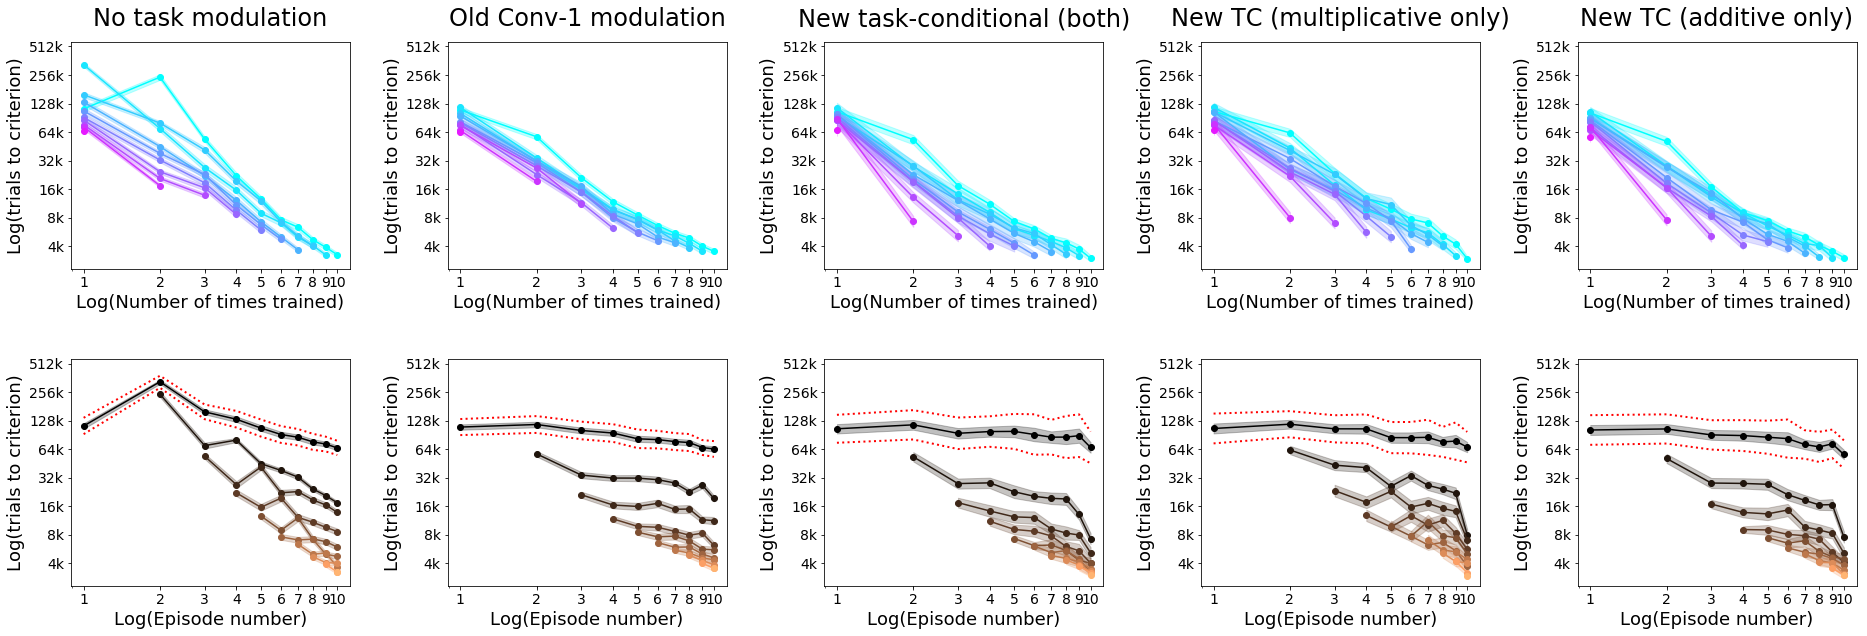

In [14]:
NROWS = 2
NCOLS = 5
COL_WIDTH = 6
ROW_HEIGHT = 5 
WIDTH_SPACING = 2
HEIGHT_SPACING = 0

title_font_dict = TITLE_FONT_DICT.copy()
title_font_dict['pad'] = 16

multi_plot_font_dict = FONT_DICT.copy()
multi_plot_font_dict['fontsize'] = 18
    
figure = plt.figure(figsize=(NCOLS * COL_WIDTH + WIDTH_SPACING, NROWS * ROW_HEIGHT + HEIGHT_SPACING))
plt.subplots_adjust(hspace=0.4, wspace=0.35)

LOG_PLOT_YLIM = (7.75, 13.25)

axes = (plt.subplot(NROWS, NCOLS, 1), plt.subplot(NROWS, NCOLS, NCOLS + 1))
plots.plot_processed_results_all_dimensions(six_replications_analyses, data_index=1, 
                                            title='',
                                            ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                            font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight', add_colorbars=False,
                                            title_font_dict=title_font_dict, external_axes=axes,
                                            num_times_trained_title='No task modulation',
#                                             plot_regression=True, regression_legend=True
                                           )

mod_level = 1
axes = (plt.subplot(NROWS, NCOLS, 1 + mod_level), plt.subplot(NROWS, NCOLS, NCOLS + 1 + mod_level))
plots.plot_processed_results_all_dimensions(query_mod_updated_analyses[mod_level], data_index=1, 
                                            title='',
                                            ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(60, 60, 60, 180), shade_error=True,
                                            font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight', add_colorbars=False,
                                            title_font_dict=title_font_dict, external_axes=axes,
                                            num_times_trained_title=f'Old Conv-{mod_level} modulation',
#                                             plot_regression=True, regression_legend=True
                                           )

for i, (data, name) in enumerate(
    zip( (task_conditional_analyses, task_conditional_multiplicative_only_analyses, task_conditional_additive_only_analyses),
        ('New task-conditional (both)', 'New TC (multiplicative only)', 'New TC (additive only)'))):
    ax_index = 3 + i
    axes = (plt.subplot(NROWS, NCOLS, ax_index), plt.subplot(NROWS, NCOLS, NCOLS + ax_index))
    plots.plot_processed_results_all_dimensions(data, data_index=1, 
                                                title='',
                                                ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(20, 20, 20, 60), shade_error=True,
                                                font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                                    dimension_names=('',), dimension_indices=(3,),
                                                num_tasks_trained_highlight_first_time='highlight', add_colorbars=False,
                                                title_font_dict=title_font_dict, external_axes=axes,
                                                num_times_trained_title=name,
#                                                 plot_regression=True, regression_legend=True
                                               )



# plots.save('workshop/combined_by_modulation_level_with_regression.pdf')
plt.show()

# TODO: Comparison plot, stlye Figure 6 in the paper

log(y) = -1.478 log(x) + 11.3


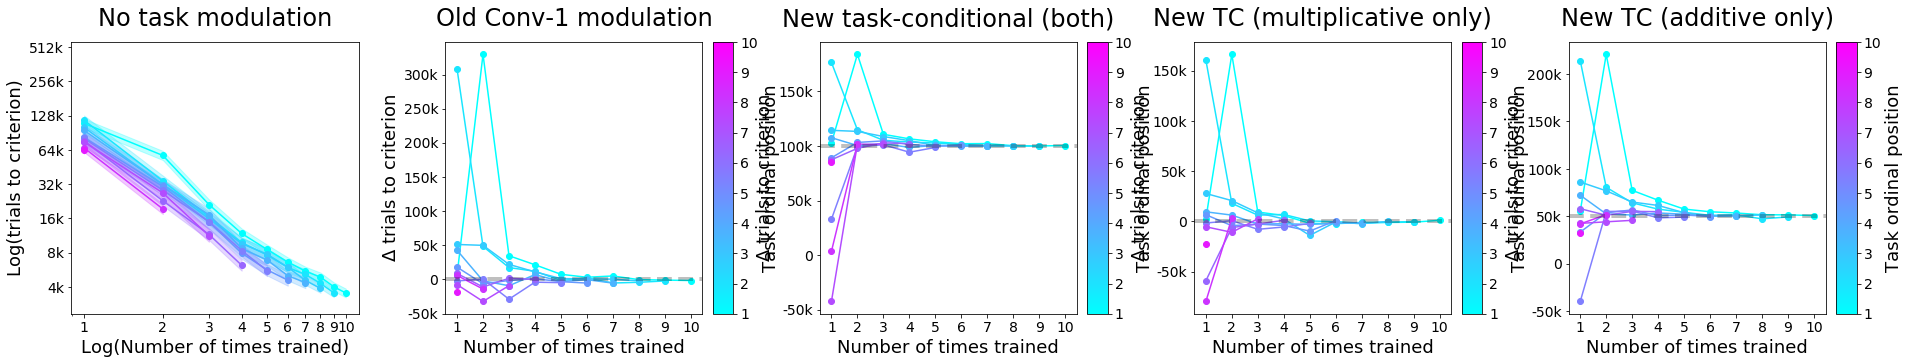

In [26]:
NROWS = 1
NCOLS = 5
COL_WIDTH = 6
ROW_HEIGHT = 5
WIDTH_SPACING = 2
HEIGHT_SPACING = 0

title_font_dict = TITLE_FONT_DICT.copy()
title_font_dict['pad'] = 16

multi_plot_font_dict = FONT_DICT.copy()
multi_plot_font_dict['fontsize'] = 18
    
figure = plt.figure(figsize=(NCOLS * COL_WIDTH + WIDTH_SPACING, NROWS * ROW_HEIGHT + HEIGHT_SPACING))
plt.subplots_adjust(hspace=0.4, wspace=0.3)



LOG_PLOT_YLIM = (7.75, 13.25)
mod_level = 1
axes = (plt.subplot(NROWS, NCOLS, 1), None)
plots.plot_processed_results_all_dimensions(query_mod_updated_analyses[mod_level], data_index=1, 
                                            title='',
                                            ylim=LOG_PLOT_YLIM, log_x=True, log_y=True, sem_n=(30, 30, 30, 90), shade_error=True,
                                            font_dict=multi_plot_font_dict, times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                            tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                            dimension_names=('',), dimension_indices=(3,),
                                            num_tasks_trained_highlight_first_time='highlight', add_colorbars=False,
                                            title_font_dict=title_font_dict, external_axes=axes,
                                            num_times_trained_title='No task modulation',
                                            plot_regression='print', regression_legend=False)

comparison_level = 0
comparison_axes = (plt.subplot(NROWS, NCOLS, 2), None)
mod_level = 1
plots.combined_comparison_plots(six_replications_updated_analyses, query_mod_updated_analyses, '',
                                comparison_level, comparison_func=np.subtract,
                                font_dict=multi_plot_font_dict, comparison_first=True, 
                                data_index=0, # ylim=EXAMPLE_RATIO_YLIM, 
                                log_x=False, log_y=False, shade_error=False,
                                title_font_dict=title_font_dict,
                                times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                plot_y_label='$\Delta$ trials to criterion',
                                y_custom_tick_labels=[None, '-50k', '0'] + [f'{i * 50}k' for i in range(1, 7)],
                                external_axes=comparison_axes, 
                                replication_levels=(mod_level,), custom_titles=(f'Old Conv-{mod_level} modulation',))



for i, (data, name) in enumerate(
    zip( (task_conditional_analyses, task_conditional_multiplicative_only_analyses, task_conditional_additive_only_analyses),
        ('New task-conditional (both)', 'New TC (multiplicative only)', 'New TC (additive only)'))):
    ax_index = 3 + i
    axes = (plt.subplot(NROWS, NCOLS, ax_index), None)
    plots.combined_comparison_plots(six_replications_updated_analyses, {1: data}, '',
                                comparison_level, comparison_func=np.subtract,
                                font_dict=multi_plot_font_dict, comparison_first=True, 
                                data_index=0, # ylim=EXAMPLE_RATIO_YLIM, 
                                log_x=False, log_y=False, shade_error=False,
                                title_font_dict=title_font_dict,
                                times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                plot_y_label='$\Delta$ trials to criterion',
                                y_custom_tick_labels=[None, '-50k', '0'] + [f'{i * 50}k' for i in range(1, 7)],
                                external_axes=axes, 
                                replication_levels=(1,), custom_titles=(name,))


# TEXT_POSITIONS = [(0.045, 0.825), (0.485, 0.825)]

# subfigure_text_font_dict = FONT_DICT.copy()
# subfigure_text_font_dict['fontsize'] += 4
# subfigure_text_font_dict['color'] = '#808080'
# subfigure_text_font_dict['weight'] = 'bold'

# num_subfigures = len(TEXT_POSITIONS)
# for i in range(num_subfigures):
#     pos = TEXT_POSITIONS[i]
#     plt.text(pos[0], pos[1], f'({chr(97 + i)})', 
#              subfigure_text_font_dict, transform=figure.transFigure)

# # add markings for which plot is which
# cmap = plt.get_cmap(QUERY_ORDINAL_POSITION_COMORLAP)
# current_font_dict = FONT_DICT.copy()
# current_font_dict['fontsize'] -= 4
# current_font_dict['color'] = matplotlib.colors.to_hex(cmap(0 / 10))
# plt.text(0.615, 0.780, f'1', current_font_dict, transform=figure.transFigure)
# current_font_dict['color'] = matplotlib.colors.to_hex(cmap(1 / 10))
# plt.text(0.5725, 0.825, f'2', current_font_dict, transform=figure.transFigure)

plt.show()

# Direct comparison to old task modulation

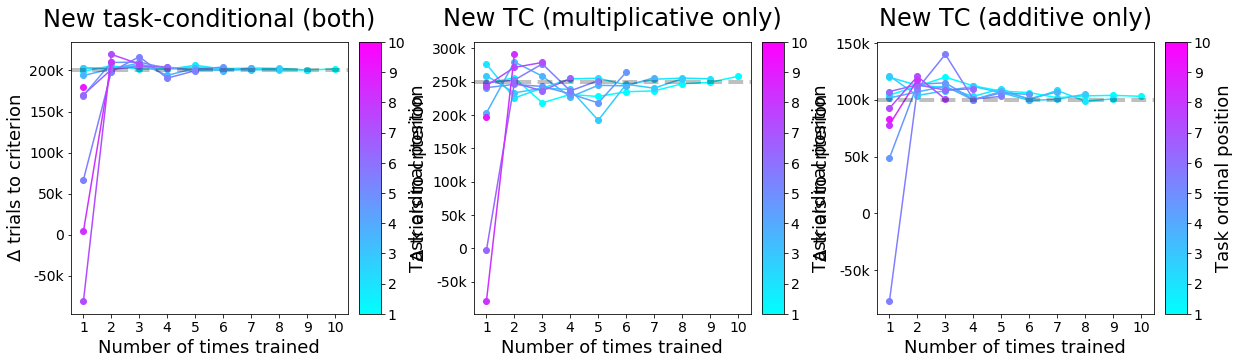

In [29]:
NROWS = 1
NCOLS = 3
COL_WIDTH = 6
ROW_HEIGHT = 5
WIDTH_SPACING = 2
HEIGHT_SPACING = 0

title_font_dict = TITLE_FONT_DICT.copy()
title_font_dict['pad'] = 16

multi_plot_font_dict = FONT_DICT.copy()
multi_plot_font_dict['fontsize'] = 18
    
figure = plt.figure(figsize=(NCOLS * COL_WIDTH + WIDTH_SPACING, NROWS * ROW_HEIGHT + HEIGHT_SPACING))
plt.subplots_adjust(hspace=0.4, wspace=0.3)


mod_level = 1

for i, (data, name) in enumerate(
    zip( (task_conditional_analyses, task_conditional_multiplicative_only_analyses, task_conditional_additive_only_analyses),
        ('New task-conditional (both)', 'New TC (multiplicative only)', 'New TC (additive only)'))):
    ax_index = 1 + i
    axes = (plt.subplot(NROWS, NCOLS, ax_index), None)
    plots.combined_comparison_plots(query_mod_updated_analyses[mod_level], {1: data}, '',
                                comparison_level, comparison_func=np.subtract,
                                font_dict=multi_plot_font_dict, comparison_first=True, 
                                data_index=0, # ylim=EXAMPLE_RATIO_YLIM, 
                                log_x=False, log_y=False, shade_error=False,
                                title_font_dict=title_font_dict,
                                times_trained_colormap=QUERY_ORDINAL_POSITION_COMORLAP, 
                                tasks_trained_colormap=NUM_TIMES_TRAINED_COLORMAP,
                                plot_y_label='$\Delta$ trials to criterion',
                                y_custom_tick_labels=[None, '-50k', '0'] + [f'{i * 50}k' for i in range(1, 7)],
                                external_axes=axes, 
                                replication_levels=(1,), custom_titles=(name,))

    
# TEXT_POSITIONS = [(0.045, 0.825), (0.485, 0.825)]

# subfigure_text_font_dict = FONT_DICT.copy()
# subfigure_text_font_dict['fontsize'] += 4
# subfigure_text_font_dict['color'] = '#808080'
# subfigure_text_font_dict['weight'] = 'bold'

# num_subfigures = len(TEXT_POSITIONS)
# for i in range(num_subfigures):
#     pos = TEXT_POSITIONS[i]
#     plt.text(pos[0], pos[1], f'({chr(97 + i)})', 
#              subfigure_text_font_dict, transform=figure.transFigure)

# # add markings for which plot is which
# cmap = plt.get_cmap(QUERY_ORDINAL_POSITION_COMORLAP)
# current_font_dict = FONT_DICT.copy()
# current_font_dict['fontsize'] -= 4
# current_font_dict['color'] = matplotlib.colors.to_hex(cmap(0 / 10))
# plt.text(0.615, 0.780, f'1', current_font_dict, transform=figure.transFigure)
# current_font_dict['color'] = matplotlib.colors.to_hex(cmap(1 / 10))
# plt.text(0.5725, 0.825, f'2', current_font_dict, transform=figure.transFigure)

plt.show()